In [1]:
library(dynlm)
library(car)
library(carData)
library(zoo)
library(xts)
library(tsbox)
library(tseries)
library(forecast)
library(astsa)
library(gvlma)
library(hwwntest)

Warning message:
"package 'dynlm' was built under R version 3.5.3"Loading required package: zoo
Warning message:
"package 'zoo' was built under R version 3.5.3"
Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'car' was built under R version 3.5.3"Loading required package: carData
Warning message:
"package 'carData' was built under R version 3.5.3"Warning message:
"package 'xts' was built under R version 3.5.3"Warning message:
"package 'tsbox' was built under R version 3.5.3"Warning message:
"package 'tseries' was built under R version 3.5.3"Warning message:
"package 'forecast' was built under R version 3.5.3"Warning message:
"package 'astsa' was built under R version 3.5.3"
Attaching package: 'astsa'

The following object is masked from 'package:forecast':

    gas

Warning message:
"package 'gvlma' was built under R version 3.5.2"Warning message:
"package 'hwwntest' was built under R version 3.5.3

In [2]:
# Making an xts object for the data
# indore

indore <- as.data.frame(read.csv("../../Data/DistTimeSeries/Cases/Indore.csv", sep = ","))
indore$ï..Date <- as.Date(indore$ï..Date , format = "%d-%m-%Y")
colnames(indore) <- c("Date", "NewCases", "TotalCases", "Lockdown", "Temperature", "RH")
indore.xts <- xts(indore, order.by=indore$Date)
indore.xts <- indore.xts[, colnames(indore.xts) != "Date"]
head(indore)

Date,NewCases,TotalCases,Lockdown,Temperature,RH
2020-01-30,0,0,0,16,43
2020-01-31,0,0,0,18,37
2020-02-01,0,0,0,18,38
2020-02-02,0,0,0,18,36
2020-02-03,0,0,0,20,40
2020-02-04,0,0,0,21,44


In [20]:
# We make date with zero cases to 1 case
indore.xts$NewCases <- replace(indore.xts$NewCases, (as.numeric(indore.xts$NewCases) == 0), "1")

# Making new dataset after 20-Mar
startDate <- as.Date("25-Mar-20" , format = "%d-%b-%y")
endDate <- as.Date("27-Apr-20" , format = "%d-%b-%y")
newIndore.xts <- subset(indore.xts, index(indore.xts)>=startDate)
newIndore.xts <- subset(newIndore.xts, index(newIndore.xts)<=endDate)

newIndore.xts

           NewCases TotalCases Lockdown Temperature RH  
2020-03-25 "  4"    "   4"     "1"      "28"        "33"
2020-03-26 "  5"    "   9"     "1"      "27"        "53"
2020-03-27 "  5"    "  14"     "1"      "27"        "57"
2020-03-28 "  6"    "  20"     "1"      "27"        "35"
2020-03-29 "1"      "  20"     "1"      "28"        "24"
2020-03-30 "  7"    "  27"     "1"      "29"        "20"
2020-03-31 " 18"    "  45"     "1"      "30"        "16"
2020-04-01 " 32"    "  77"     "1"      "30"        "20"
2020-04-02 "  2"    "  79"     "1"      "30"        "17"
2020-04-03 " 35"    " 114"     "1"      "31"        "15"
2020-04-04 " 14"    " 128"     "1"      "31"        "13"
2020-04-05 "  7"    " 135"     "1"      "34"        "12"
2020-04-06 " 16"    " 151"     "1"      "32"        "13"
2020-04-07 "1"      " 151"     "1"      "32"        "14"
2020-04-08 " 22"    " 173"     "1"      "30"        "18"
2020-04-09 " 48"    " 221"     "1"      "33"        "18"
2020-04-10 " 14"    " 235"     

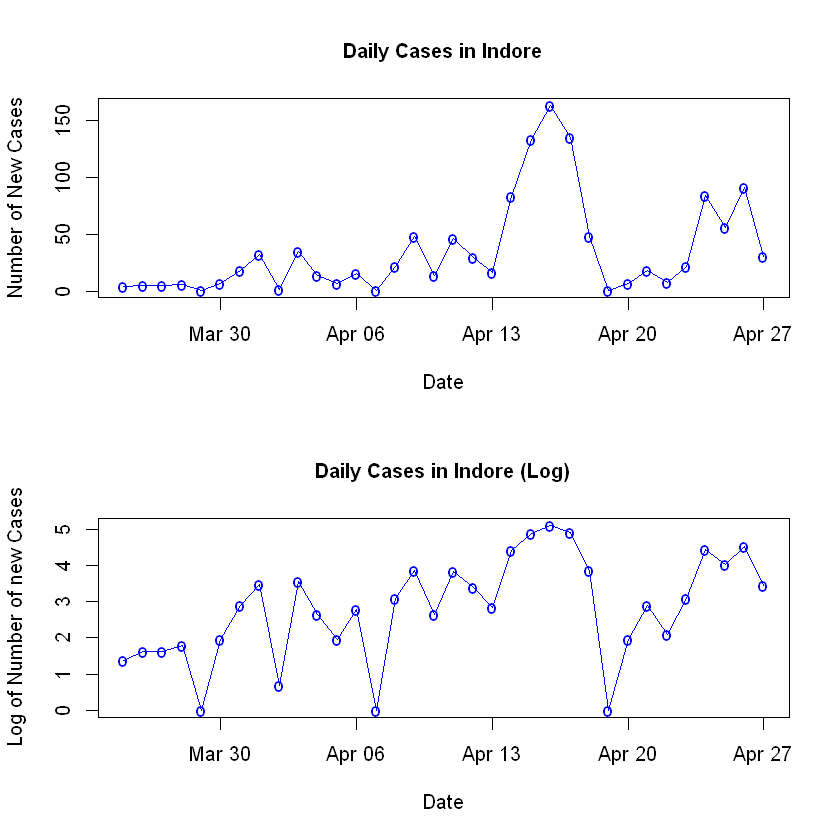

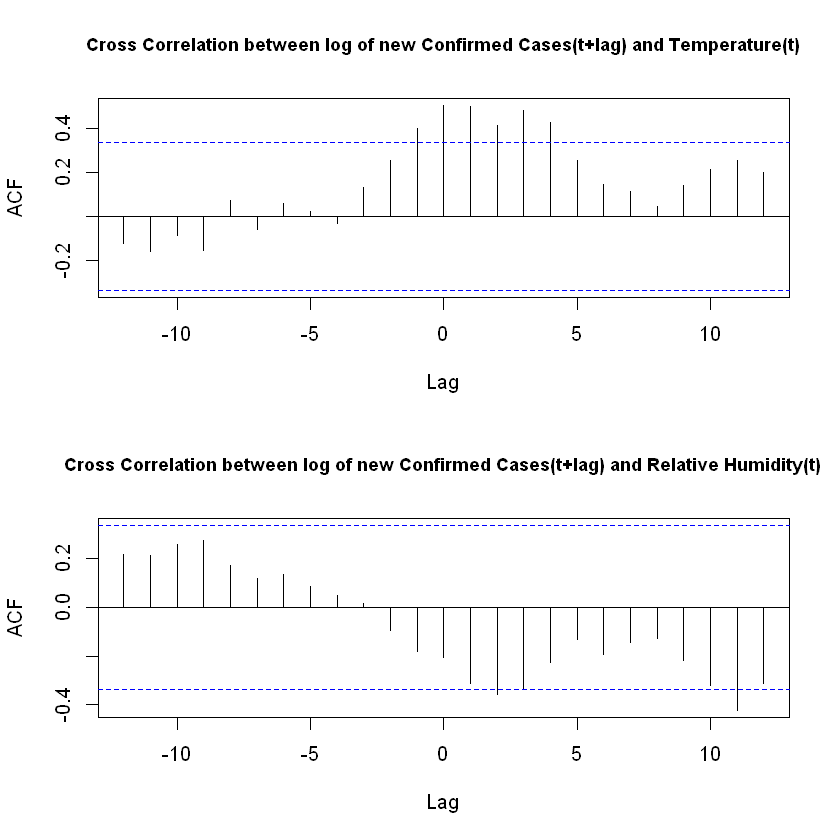

In [21]:
# Plots for Daily new Cases

par(mfrow = c(2,1), cex.main=1) # set up the graphics
plot(index(newIndore.xts), newIndore.xts$NewCases, type="o", col="blue", pch="o", lty=1, main="Daily Cases in Indore", ylab="Number of New Cases", xlab="Date")
plot(index(newIndore.xts), log(as.numeric(newIndore.xts$NewCases)), type="o", col="blue", pch="o", lty=1, main="Daily Cases in Indore (Log)", ylab="Log of Number of new Cases", xlab="Date")

par(mfrow = c(2,1), cex.main=0.9)
# acf(log(as.numeric(newIndore.xts$NewCases)), main="Autocorrelation for log of number of Confirmed Cases (Daily new)")
ccf(log(as.numeric(newIndore.xts$NewCases)), as.numeric(newIndore.xts$Temperature), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Temperature(t)")
ccf(log(as.numeric(newIndore.xts$NewCases)), as.numeric(newIndore.xts$RH), main="Cross Correlation between log of new Confirmed Cases(t+lag) and Relative Humidity(t)")


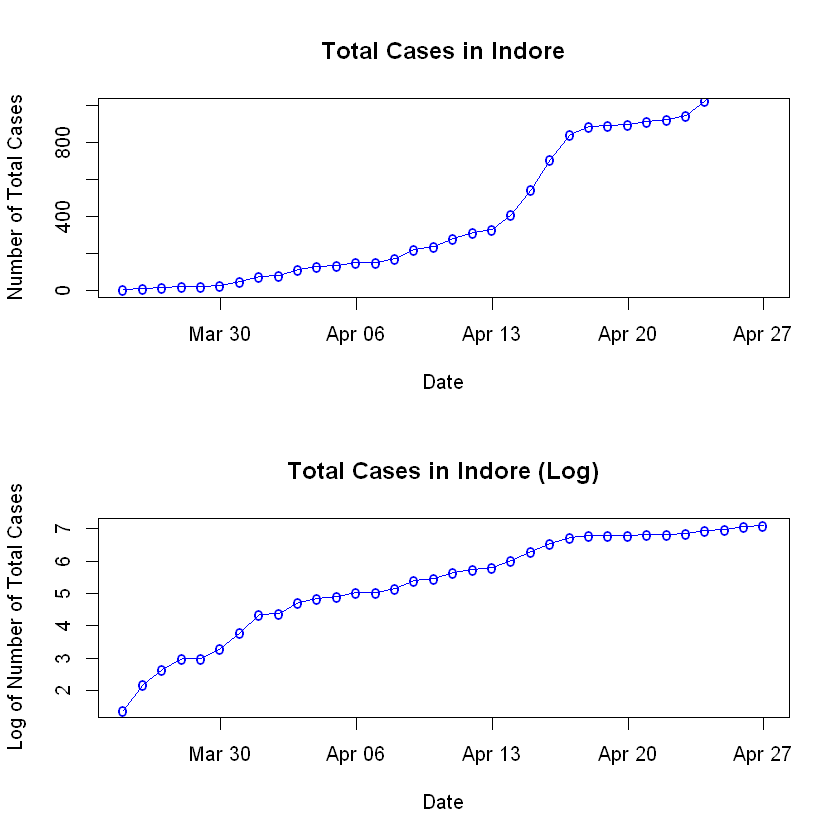

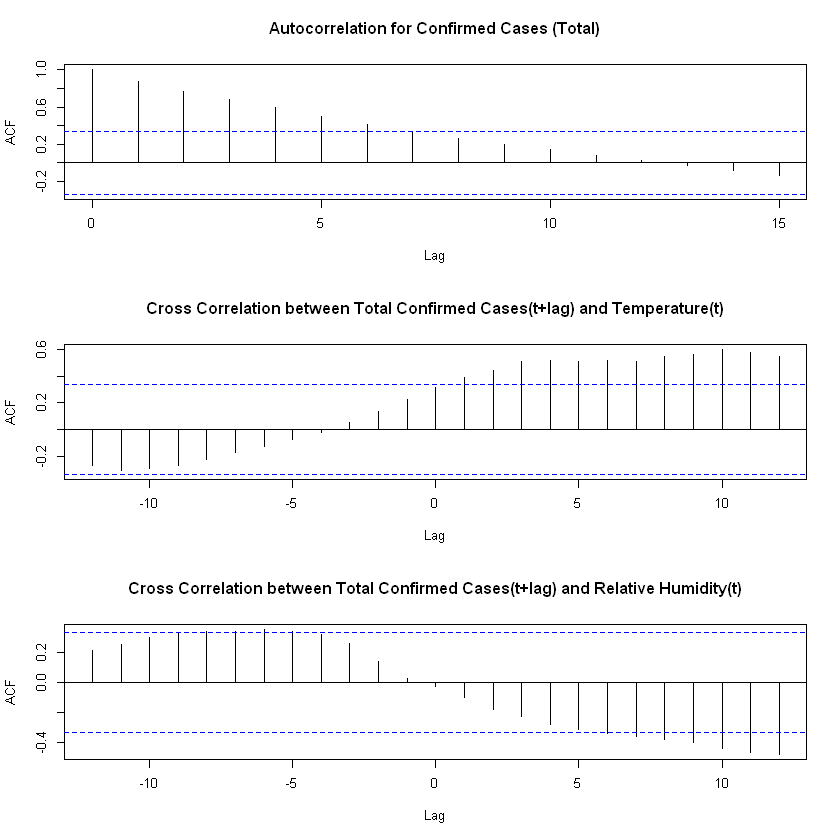

In [22]:
# Plots for Total Cases

par(mfrow = c(2,1)) # set up the graphics
plot(index(newIndore.xts), newIndore.xts$TotalCases, type="o", col="blue", pch="o", lty=1, main="Total Cases in Indore", ylab="Number of Total Cases", xlab="Date",ylim=c(0,1000))
plot(index(newIndore.xts), log(as.numeric(newIndore.xts$TotalCases)), type="o", col="blue", pch="o", lty=1, main="Total Cases in Indore (Log)", ylab="Log of Number of Total Cases", xlab="Date")

par(mfrow = c(3,1), cex.main=1.2)
acf(log(as.numeric(newIndore.xts$TotalCases)), main="Autocorrelation for Confirmed Cases (Total)")
ccf(as.numeric(newIndore.xts$TotalCases), as.numeric(newIndore.xts$Temperature), main="Cross Correlation between Total Confirmed Cases(t+lag) and Temperature(t)")
ccf(as.numeric(newIndore.xts$TotalCases), as.numeric(newIndore.xts$RH), main="Cross Correlation between Total Confirmed Cases(t+lag) and Relative Humidity(t)")

In [23]:
# Making time squared trend to be fit
# Adding plus 1 kyunki baadme vo subtract ho jaayega
timeTrend_2 <- (1:length(index(newIndore.xts))) ^2  
timeTrend <- (1:length(index(newIndore.xts)))

indore.reg.data <- data.frame(log(as.numeric(coredata(newIndore.xts$NewCases))), as.numeric(coredata(newIndore.xts$Temperature)), 
                              as.numeric(coredata(newIndore.xts$RH)),   
                              timeTrend, timeTrend_2)
colnames(indore.reg.data) <- c("TimeSeries", "Temperature", "RH", "timeTrend", "timeTrend_2")

# indore.reg.data.matrix <- data.matrix(indore.reg.data)
# indore.reg.data.xts <- xts(indore.reg.data, order.by=index(newIndore.xts))
indore.reg.data.ts <- as.ts(indore.reg.data, order.by=index(newIndore.xts))
# index(indore.reg.data.zoo)
indore.reg.data.ts 

TimeSeries,Temperature,RH,timeTrend,timeTrend_2
1.3862944,28,33,1,1
1.6094379,27,53,2,4
1.6094379,27,57,3,9
1.7917595,27,35,4,16
0.0000000,28,24,5,25
1.9459101,29,20,6,36
2.8903718,30,16,7,49
3.4657359,30,20,8,64
0.6931472,30,17,9,81
3.5553481,31,15,10,100


## Let's de trend the total Cases Data



Time series regression with "ts" data:
Start = 2, End = 34

Call:
dynlm(formula = TimeSeries ~ timeTrend + timeTrend_2 + L(Temperature, 
    1) + L(RH, 1), data = indore.reg.data.ts)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.9672 -0.6095  0.1024  0.8946  1.9862 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)
(Intercept)       -5.487599   5.501971  -0.997    0.327
timeTrend         -0.041500   0.195756  -0.212    0.834
timeTrend_2        0.001969   0.004869   0.404    0.689
L(Temperature, 1)  0.268905   0.187358   1.435    0.162
L(RH, 1)          -0.006044   0.037588  -0.161    0.873

Residual standard error: 1.255 on 28 degrees of freedom
Multiple R-squared:  0.3057,	Adjusted R-squared:  0.2065 
F-statistic: 3.082 on 4 and 28 DF,  p-value: 0.03195


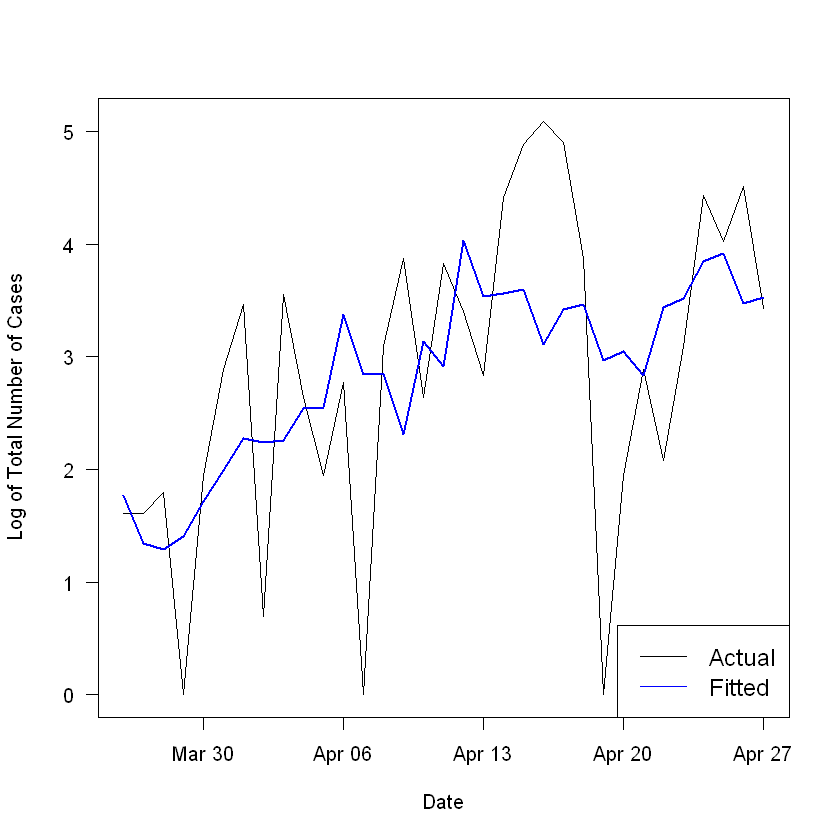

In [24]:
dataTimeSeries <- log(as.numeric(newIndore.xts$NewCases))
numRows <- length(dataTimeSeries)
start = 2
detrended <- dynlm(TimeSeries ~ timeTrend+timeTrend_2+L(Temperature,1)+L(RH,1), data=indore.reg.data.ts)
summary(detrended)
prediction <- predict(detrended)
plot(index(newIndore.xts)[start:numRows], dataTimeSeries[start:numRows], "l", las=1, xlab="Date", ylab="Log of Total Number of Cases")
lines(prediction~index(newIndore.xts)[start:numRows], col="blue", lwd=2)
legend("bottomright", 95, legend=c("Actual", "Fitted"),
       col=c("black", "blue"), lty=1, cex=1.2)
#   horiz = F , 
#   inset = c(0.1, 0.1))
# plot(residuals(detrended))
# shapiro.test(detrended$residuals)

In [25]:
# Forecasting
# Predicting for 26th, 27th and 28th
time <- c(35)
timeSquared <- time*time

# For 25th, 26th and 27th
temperature <- c(31)
RelHum <- c(27)
data <- data.frame(temperature, RelHum, time, timeSquared)
colnames(data) <- c("Temperature", "RH", "timeTrend", "timeTrend_2")
data
pred <- predict(detrended, newdata = data)
varianceError <- var(detrended$residuals)
varianceError <- varianceError/2
varianceError
exp(pred)
pred <- pred+varianceError
finalPred <- exp(pred)
finalPred
initial <- exp(dataTimeSeries[32])
initial

Temperature,RH,timeTrend,timeTrend_2
31,27,35,1225


[1] 0.6895992

1 
38.2546

1 
76.23823

[1] 56

In [26]:
# par(mfrow = c(2,1))
# acf(detrended$residuals, main="Autocorrelation between residuals")
# pacf(detrended$residuals, main="Partial autocorrelation between residuals")

### The model for total cases depict autocorrelation, therefore we perform arima on the residuals

In [10]:
nrows <- length(detrended$residuals)
residualTimeSeries <- detrended$residuals
fit <- auto.arima(residualTimeSeries, method="ML")
fit

Series: residualTimeSeries 
ARIMA(0,0,0) with zero mean 

sigma^2 estimated as 1.378:  log likelihood=-48.96
AIC=99.92   AICc=100.05   BIC=101.35

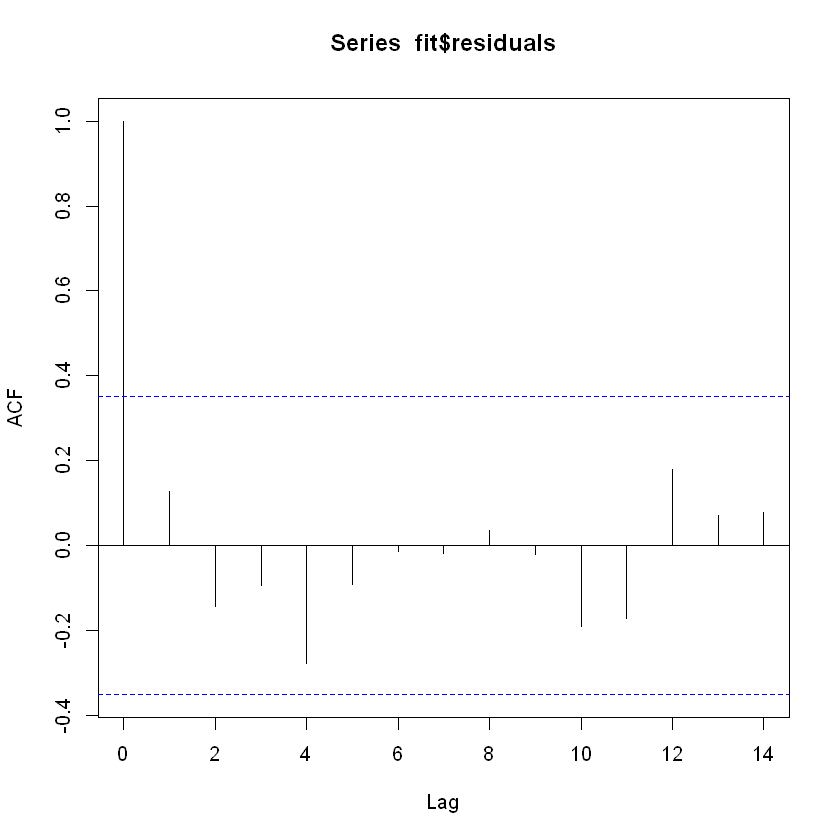

In [11]:
acf(fit$residuals)